<a href="https://colab.research.google.com/github/lilylu0105/111-1-econDV/blob/main/week_7_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source Link : <https://data.gov.tw/dataset/9346>

各縣市四類公司 （"無限公司", "兩合公司", "有限公司", "股份有限公司"）資本額佔比有多少？


In [ ]:
googledrive::drive_deauth()
googledrive::drive_download(googledrive::as_id("https://drive.google.com/file/d/1e8wCNupFgVFGmCIOovDQYpkfeV_XcbKb/view?usp=sharing"))

File downloaded:

• 202208 (1).csv <id: 1e8wCNupFgVFGmCIOovDQYpkfeV_XcbKb>

Saved locally as:

• 202208 (1).csv



In [ ]:
newCompanies = readr::read_csv("./202208 (1).csv") #"https://data.gcis.nat.gov.tw/od/file?oid=8B227133-FFAB-4218-963C-21846226B750")

Rows: 25 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): 縣 市 別
dbl (16): 總計家數, 總計資本額, 無限公司家數, 無限公司資本額, 兩合公司家數, 兩合公司資本額, 有限公司家數, 有限公司資本額, 股份...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
if(!require(showtext)) install.packages("showtext")
showtext::showtext_auto()
library(ggplot2)
# set our graph theme to use the google font and a classic white back ground
theme_set(
  theme(
    text=element_text(family = "Noto Sans TC")
  )+
    theme_classic()
)
Plot <- function(data) {
  plot = new.env()
  plot$data=data
  plot$ggplot=NULL
  plot$geoms=NULL
  plot$make=function(){
    plot$ggplot+plot$geoms
  }
  plot$save=function(){
    saveRDS(plot, filename)
    message(paste("The plot is saved at ", filename))
  }
  return(plot)
}

Loading required package: showtext

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘showtext’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sysfonts’, ‘showtextdb’




In [ ]:
options(scipen=999) # 科學符號數字轉成一般數字

# ChiehH Ju




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




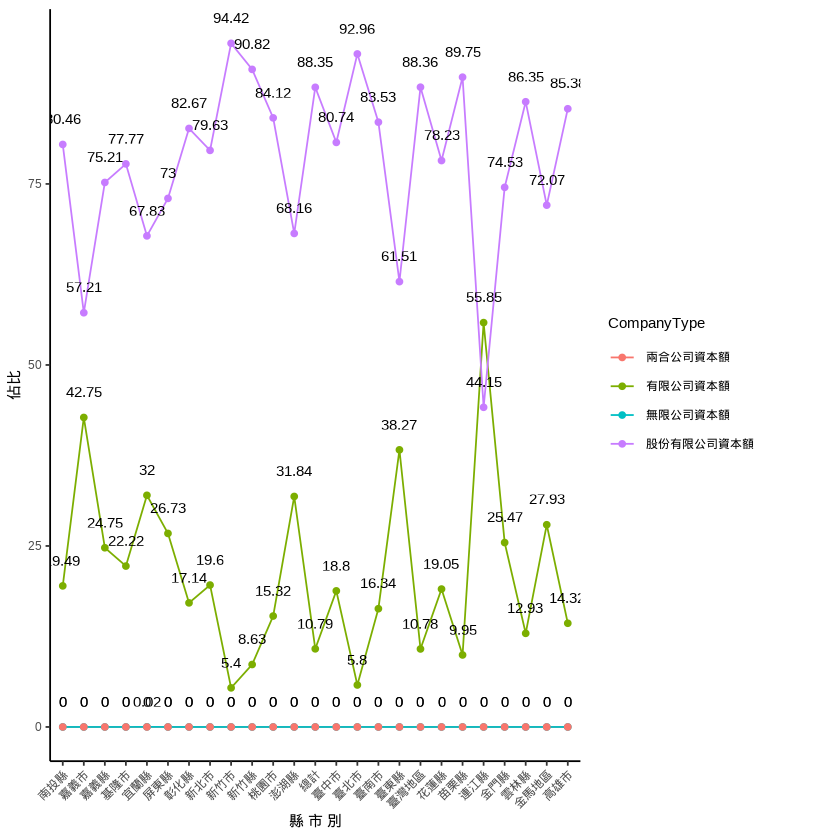

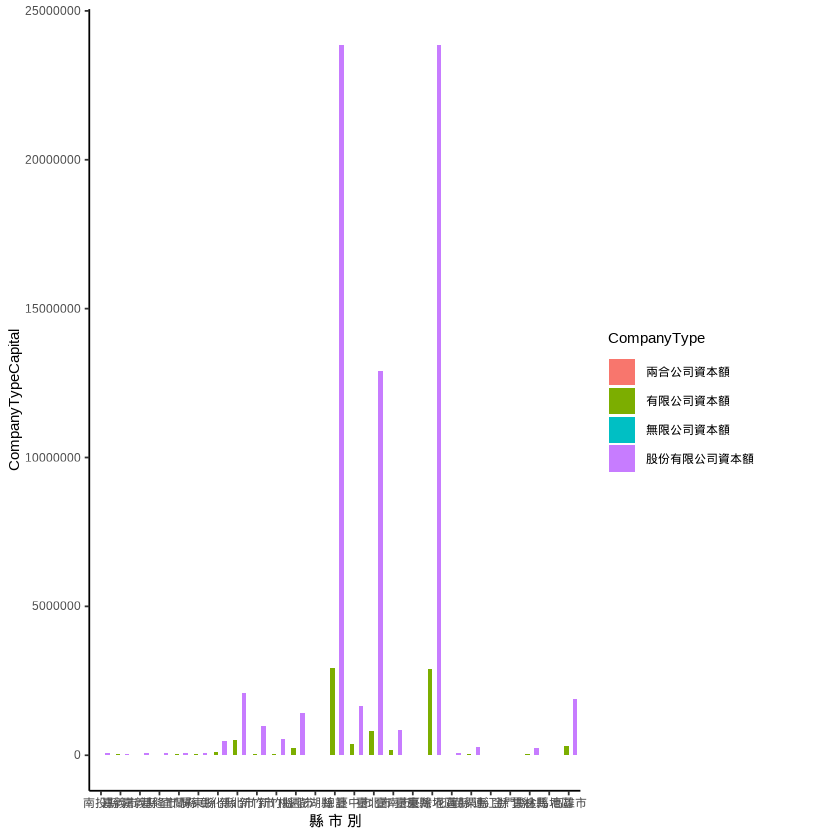

In [ ]:
eachTypeCompanyCapital <- newCompanies[c("縣 市 別", "總計資本額", "無限公司資本額", "兩合公司資本額", "有限公司資本額", "股份有限公司資本額")]

tidyr::pivot_longer(
  data = eachTypeCompanyCapital,
  cols = 3:6,
  names_to = "CompanyType",
  values_to = "CompanyTypeCapital"
) -> eachTypeCompanyCapital_long

library(dplyr)
options(scipen = 999)

eachTypeCompanyCapital_long |>
  mutate(
    佔比 = (eachTypeCompanyCapital_long[[4]] / eachTypeCompanyCapital_long[[2]]) * 100
  ) -> eachTypeCompanyCapital_long

eachTypeCompanyCapital_long$`縣 市 別` |>
  factor() |>
  levels() -> OrLevels

c(OrLevels[-c(23, 25)], OrLevels[c(23, 25)]) -> correctLevels

eachTypeCompanyCapital_long$`縣 市 別` |>
  factor(
    levels = correctLevels
  ) -> eachTypeCompanyCapital_long$`縣 市 別`

plot <- Plot(eachTypeCompanyCapital_long)
plot$ggplot <- ggplot(data = plot$data)
plot$theme <- theme(
  axis.text.x = element_text(
    angle = 45, hjust = 1
  )
)
plot$geoms <- list(
  geom_line(
    aes(
      x = `縣 市 別`,
      y = 佔比,
      colour = CompanyType,
      group = CompanyType
    )
  ),
  geom_point(
    aes(
      x = `縣 市 別`,
      y = 佔比,
      colour = CompanyType,
    )
  ), geom_text(
    aes(
      x = `縣 市 別`,
      y = 佔比,
      label = round(佔比, 2)
    ),
    vjust = -2
  )
) -> geom_1

plot$ggplot + plot$theme + geom_1

{
  plot$geoms <- list(
    geom_col(
      aes(
        x = `縣 市 別`,
        y = CompanyTypeCapital,
        fill = CompanyType
      ),
      position = "dodge"
    )
  )
} -> geom_2
plot$make()

# Default theme

In [ ]:
plot$theme = list(
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    panel.grid.major.y = element_line(color="#c4d1d7")
  )
)

If there are any other theme setting to add, say



```
theme(
axis.text.x = element_text(
angle=45, hjust=1
))
```

You can append it. 

In [ ]:
plot$theme = append(plot$theme,
list(
  theme(
    axis.text.x = element_text(
    angle=45, hjust=1
    ))
))

# 直方分配圖

In [ ]:
googledrive::drive_deauth()
googledrive::drive_download("https://drive.google.com/file/d/1Cd4paAOsEs8Rec-4o8VNh6MfsXMLo-qs/view?usp=sharing", 
overwrite =T)

File downloaded:

• eachTypeCompanyCapital_long.Rds <id: 1Cd4paAOsEs8Rec-4o8VNh6MfsXMLo-qs>

Saved locally as:

• eachTypeCompanyCapital_long.Rds



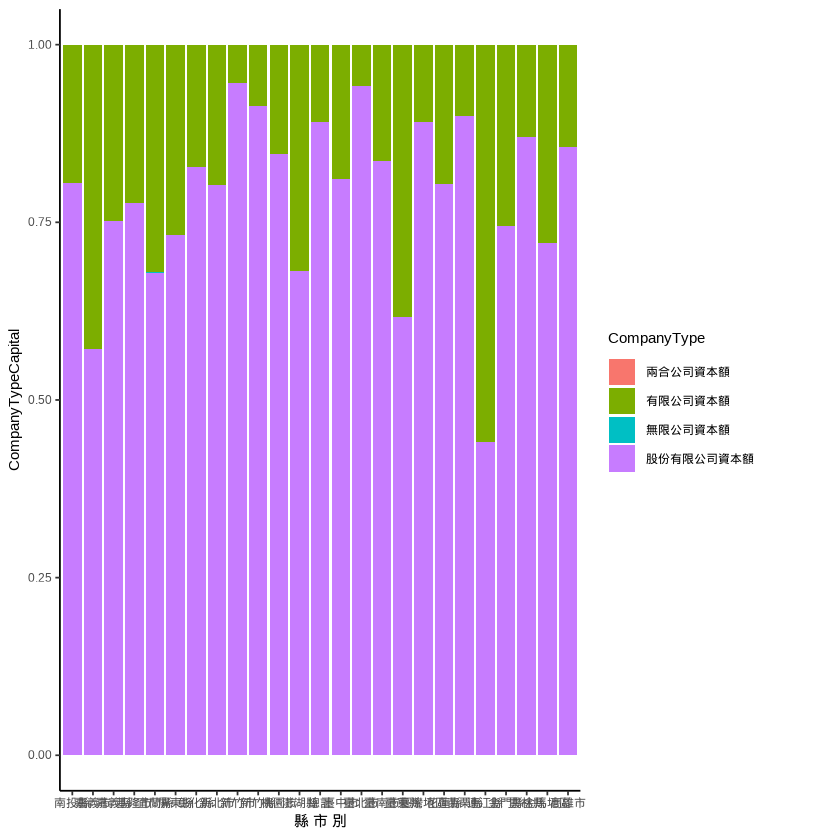

In [ ]:
eachTypeCompanyCapital_long = readRDS(
  "eachTypeCompanyCapital_long.Rds"
)
ggplot(data=eachTypeCompanyCapital_long)+
  geom_col(
    mapping=aes(
      x=`縣 市 別`,
      y=CompanyTypeCapital, # 佔比的來源
      fill=CompanyType
    ),
    position="fill" # 
  )

Or

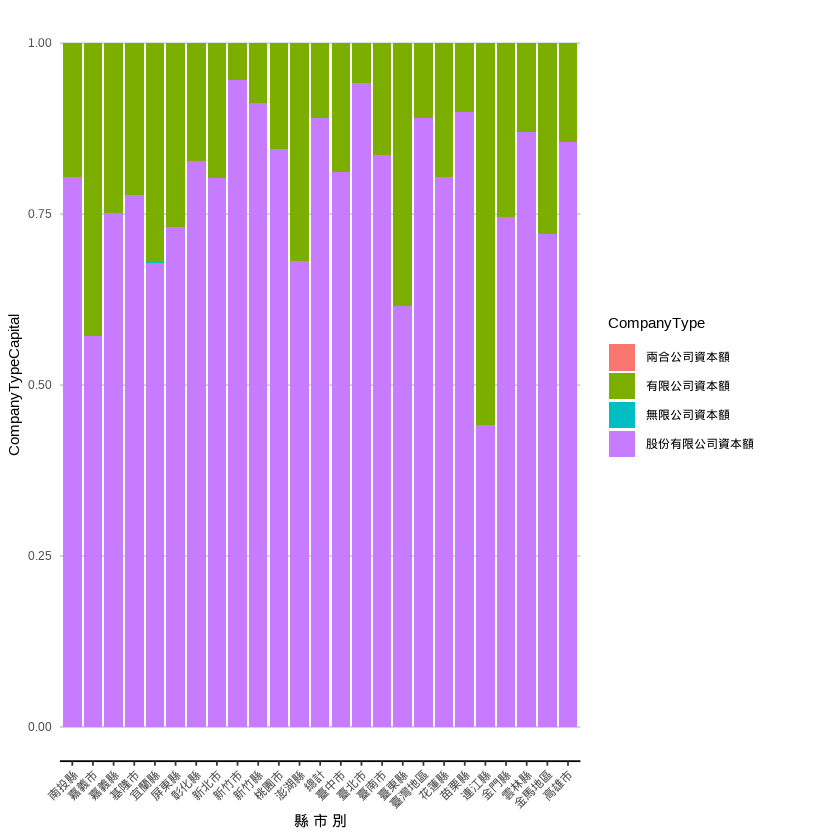

In [ ]:
Plot2 = function(){
  plt2 <- new.env()
  plt2$ggplot = ggplot(data=eachTypeCompanyCapital_long)
  plt2$geoms = list(
    geom_col(
      mapping=aes(
        x=`縣 市 別`,
        y=CompanyTypeCapital, # 佔比的來源
        fill=CompanyType
      ),
      position="fill" # 
    )
  )
  plt2$theme = list(
    theme(
      axis.line.y = element_blank(),
      axis.ticks.y = element_blank(),
      panel.grid.major.y = element_line(color="#c4d1d7")
    ),
    theme(
    axis.text.x = element_text(
    angle=45, hjust=1
    ))
  )

  plt2$make = function(){
  with(plt2, 
  ggplot+geoms+theme)}

  return(plt2)
}

plt2 = Plot2()
plt2$make()

# Level sequence in CompanyType



c("兩合公司資本額", "有限公司資本額", "無限公司資本額", 
"股份有限公司資本額")


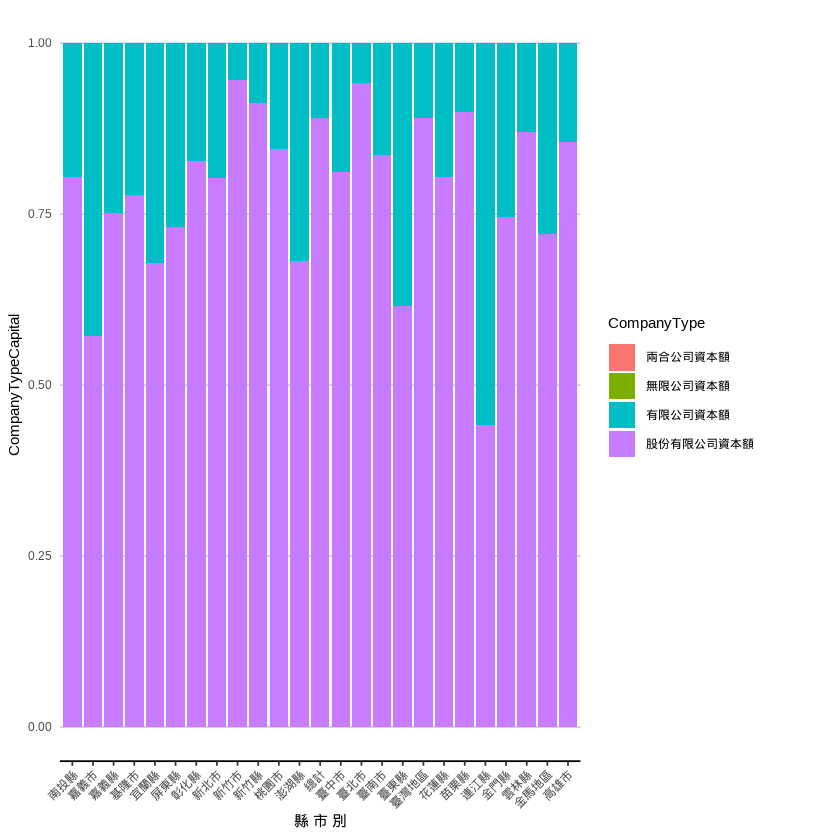

In [ ]:
eachTypeCompanyCapital_long$CompanyType |> factor() |> levels() |> dput()

eachTypeCompanyCapital_long |>
  mutate(
    CompanyType=factor(CompanyType, levels=c("兩合公司資本額", "無限公司資本額", "有限公司資本額",
"股份有限公司資本額"))
  ) ->
  eachTypeCompanyCapital_long

Plot2()$make()

# The levels of `縣市別`

Rearrange it to bring out a clear comparison story.

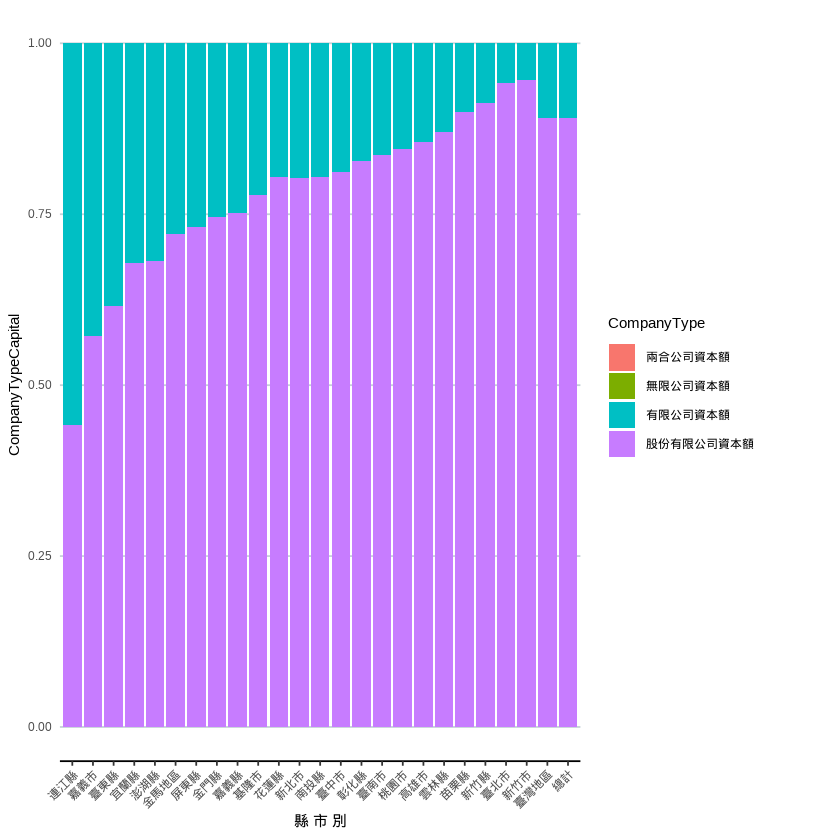

In [ ]:
eachTypeCompanyCapital_long |>
  dplyr::filter(
    CompanyType == "股份有限公司資本額"
  ) |>
  arrange(佔比) |>
  pull(`縣 市 別`) |>
  as.character() -> graphLevels
graphLevels <- c(
  setdiff(graphLevels, c("臺灣地區","總計")),
  c("臺灣地區","總計"))
eachTypeCompanyCapital_long$`縣 市 別` <- 
  factor(eachTypeCompanyCapital_long$`縣 市 別`,
  levels=graphLevels)

# Regenerate plt2
plt2 = Plot2()
plt2$make()

In [ ]:
eachTypeCompanyCapital_long |> 
  mutate(
    isWholeRegion = `縣 市 別` %in% c("臺灣地區","總計")
  ) -> eachTypeCompanyCapital_long

依照isWholeRegion不同(vars(...))畫不同的plt2()在一個row(nrow=1)上，不同plt2()可以有不同x刻度（free_x)



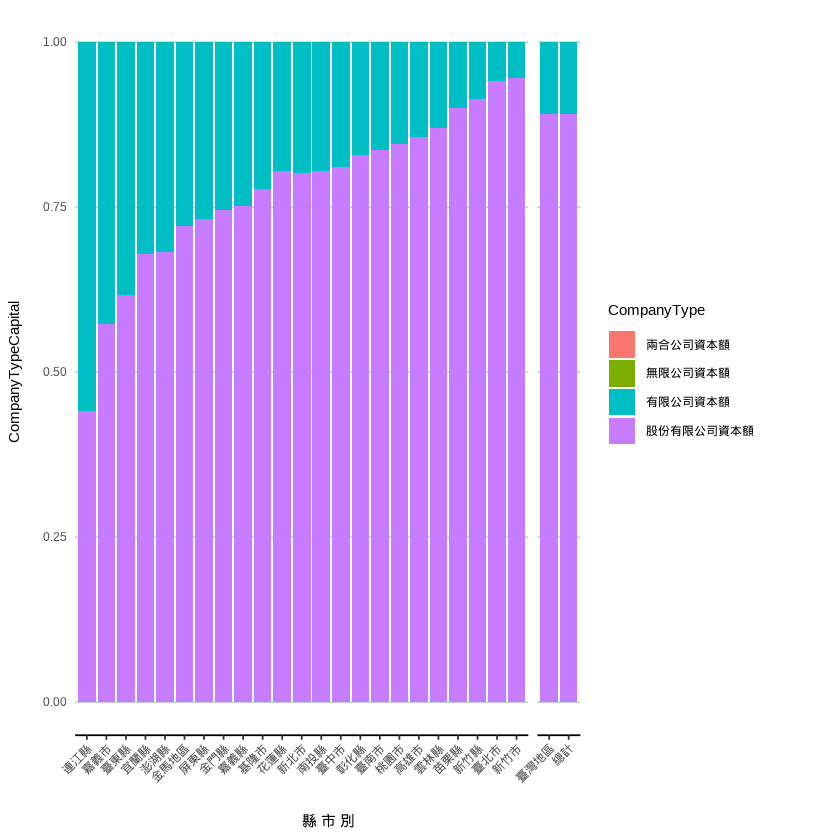

In [ ]:
Plot2()$make()+facet_grid(cols = vars(isWholeRegion),scales="free_x", space="free_x") + theme(
  strip.text = element_blank()
) -> plt2Final
plt2Final

In [ ]:
png("plot2Final.png", width = 600, height = 400)
plt2Final
dev.off()

png 
  2

ERROR: ignored